### Exploratory Data Analysis of Homer Segementation Data

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from kmodes import kmodes, kprototypes
import scipy.stats as scs
%matplotlib inline

df_users = pd.read_pickle('data/df_users.pkl')
df = pd.read_pickle('data/df.pkl')

In [26]:
df.shape

(176290, 15)

In [24]:
df_users.shape

(8741, 15)

In [5]:
df_users['NumSims'].describe()

count    8741.000000
mean       20.168173
std        75.455460
min         1.000000
25%         1.000000
50%         4.000000
75%        15.000000
max      3211.000000
Name: NumSims, dtype: float64

In [2]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8741 entries, 0 to 8740
Data columns (total 15 columns):
UserId                8741 non-null object
NumSims               8741 non-null int64
UserRole              8741 non-null object
OrganizationType      8741 non-null object
Sample                8741 non-null int64
Latitude              8741 non-null float64
Longitude             8741 non-null float64
ImportedWind          8741 non-null int64
ImportedSolar         8741 non-null int64
GenCostMultiLines     8741 non-null int64
WindCostMultiLines    8741 non-null int64
BatCostMultiLines     8741 non-null int64
PvCostMultiLines      8741 non-null int64
ConCostMultiLines     8741 non-null int64
Country               8741 non-null object
dtypes: float64(2), int64(9), object(4)
memory usage: 1.0+ MB


In [3]:
df_users.UserRole.value_counts(dropna=False)

Academic     4305
Technical    2412
NA           1330
Business      694
Name: UserRole, dtype: int64

In [4]:
df_users.OrganizationType.value_counts(dropna=False)

Academic       3613
NA             2730
Engineering    1719
Vendor          340
Public          175
Service         164
Name: OrganizationType, dtype: int64

In [155]:
df_users.Sample.value_counts(dropna=False)

0    8320
1     421
Name: Sample, dtype: int64

### EDA with clustered data (by user and simulation)

In [27]:
df_users_clustered = pd.read_pickle('data/df_users_clustered.pkl')
df_clustered = pd.read_pickle('data/df_clustered.pkl')

In [135]:
df_users_clustered.shape

(8741, 18)

In [134]:
df_clustered.shape

(176290, 17)

In [30]:
df_users_clustered.columns

Index(['UserId', 'NumSims', 'UserRole', 'OrganizationType', 'Sample',
       'Latitude', 'Longitude', 'ImportedWind', 'ImportedSolar',
       'GenCostMultiLines', 'WindCostMultiLines', 'BatCostMultiLines',
       'PvCostMultiLines', 'ConCostMultiLines', 'Country', 'GM_Cluster',
       'KM_Cluster', 'AG_Cluster'],
      dtype='object')

In [28]:
bool_cols = ('Sample', 'ImportedWind', 'ImportedSolar', 'GenCostMultiLines', 'WindCostMultiLines',
       'BatCostMultiLines', 'PvCostMultiLines', 'ConCostMultiLines')

for col in bool_cols:
    df_users_clustered[col] = df_users_clustered[col].astype(bool)
    df_clustered[col] = df_clustered[col].astype(bool)

In [38]:
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176290 entries, 0 to 176289
Data columns (total 17 columns):
UserRole              176290 non-null category
OrganizationType      176290 non-null category
Sample                176290 non-null bool
Latitude              176290 non-null float64
Longitude             176290 non-null float64
User                  176290 non-null object
Created               176290 non-null datetime64[ns]
ImportedWind          176290 non-null bool
ImportedSolar         176290 non-null bool
GenCostMultiLines     176290 non-null bool
WindCostMultiLines    176290 non-null bool
BatCostMultiLines     176290 non-null bool
PvCostMultiLines      176290 non-null bool
ConCostMultiLines     176290 non-null bool
Country               176290 non-null object
GM_Cluster            176290 non-null int64
KM_Cluster            176290 non-null uint8
dtypes: bool(8), category(2), datetime64[ns](1), float64(2), int64(1), object(2), uint8(1)
memory usage: 11.3+ MB


In [41]:
# User clusters by clustering algorithm
AG_0_u = df_users_clustered[df_users_clustered['AG_Cluster'] == 0]
AG_1_u = df_users_clustered[df_users_clustered['AG_Cluster'] == 1]
AG_2_u = df_users_clustered[df_users_clustered['AG_Cluster'] == 2]
AG_3_u = df_users_clustered[df_users_clustered['AG_Cluster'] == 3]

KM_0_u = df_users_clustered[df_users_clustered['KM_Cluster'] == 0]
KM_1_u = df_users_clustered[df_users_clustered['KM_Cluster'] == 1]
KM_2_u = df_users_clustered[df_users_clustered['KM_Cluster'] == 2]
KM_3_u = df_users_clustered[df_users_clustered['KM_Cluster'] == 3]

GM_0_u = df_users_clustered[df_users_clustered['GM_Cluster'] == 0]
GM_1_u = df_users_clustered[df_users_clustered['GM_Cluster'] == 1]
GM_2_u = df_users_clustered[df_users_clustered['GM_Cluster'] == 2]
GM_3_u = df_users_clustered[df_users_clustered['GM_Cluster'] == 3]

# Simulation clusters by clustering algorithm
KM_0_s = df_users_clustered[df_users_clustered['KM_Cluster'] == 0]
KM_1_s = df_users_clustered[df_users_clustered['KM_Cluster'] == 1]
KM_2_s = df_users_clustered[df_users_clustered['KM_Cluster'] == 2]
KM_3_s = df_users_clustered[df_users_clustered['KM_Cluster'] == 3]

GM_0_s = df_users_clustered[df_users_clustered['GM_Cluster'] == 0]
GM_1_s = df_users_clustered[df_users_clustered['GM_Cluster'] == 1]
GM_2_s = df_users_clustered[df_users_clustered['GM_Cluster'] == 2]
GM_3_s = df_users_clustered[df_users_clustered['GM_Cluster'] == 3]

AG Cluster 0
Technical    1290
Business      423
Academic      323
NA            186
Name: UserRole, dtype: int64


AG Cluster 1
Academic     3912
Technical     378
NA            144
Business       98
Name: UserRole, dtype: int64


AG Cluster 2
NA           980
Technical    677
Business     142
Academic      14
Name: UserRole, dtype: int64


AG Cluster 3
Technical    67
Academic     56
Business     31
NA           20
Name: UserRole, dtype: int64


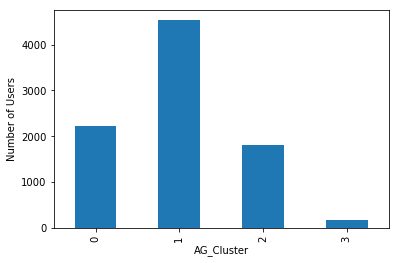

In [46]:
# User role distributions per cluster
print('AG Cluster 0')
print(AG_0_u.UserRole.value_counts(dropna=False))
print('\n')
print('AG Cluster 1')
print(AG_1_u.UserRole.value_counts(dropna=False))
print('\n')
print('AG Cluster 2')
print(AG_2_u.UserRole.value_counts(dropna=False))
print('\n')
print('AG Cluster 3')
print(AG_3_u.UserRole.value_counts(dropna=False))

grp = df_users_clustered.groupby('AG_Cluster')['UserRole'].count()
grp.plot(kind='bar').set_ylabel('Number of Users');

1    4532
0    2222
2    1813
3     174
Name: AG_Cluster, dtype: int64


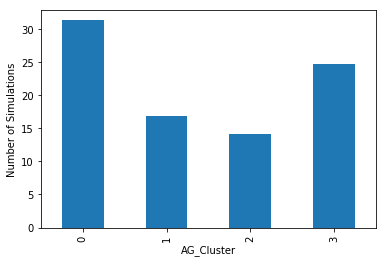

In [17]:
# Mean number of simulations per user cluster
print(df_users_clustered.AG_Cluster.value_counts(dropna=False))
grp = df_users_clustered.groupby('AG_Cluster')['NumSims'].mean()
grp.plot(kind='bar').set_ylabel('Number of Simulations');

0    4305
3    2412
1    1330
2     694
Name: GM_Cluster, dtype: int64


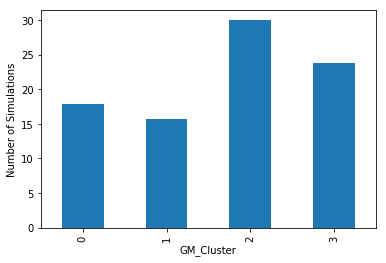

In [18]:
print(df_users_clustered.GM_Cluster.value_counts(dropna=False))
grp = df_users_clustered.groupby('GM_Cluster')['NumSims'].mean()
grp.plot(kind='bar').set_ylabel('Number of Simulations');

1    3613
0    2306
2    1777
3    1045
Name: KM_Cluster, dtype: int64


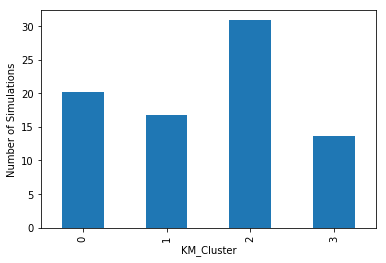

In [19]:
print(df_users_clustered.KM_Cluster.value_counts(dropna=False))
grp = df_users_clustered.groupby('KM_Cluster')['NumSims'].mean()
grp.plot(kind='bar').set_ylabel('Number of Simulations');

In [47]:
df['Created'].head()

0   2016-06-30 23:54:38
1   2016-03-11 09:31:09
2   2017-02-09 11:03:23
3   2016-03-15 09:20:52
4   2015-04-22 11:23:22
Name: Created, dtype: datetime64[ns]

<function matplotlib.pyplot.show>

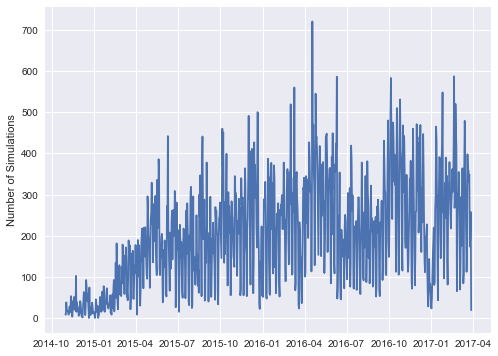

In [131]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

date_count = df_clustered.groupby(df_clustered['Created'].dt.date)['User'].count()
ax.plot(date_count)
ax.set_ylabel('Number of Simulations')
plt.show

In [132]:
sum(date_count)

176290

GM_Cluster  UserRole 
0           Academic     17.901742
1           NA           15.703008
2           Business     29.985591
3           Technical    23.850746
Name: NumSims, dtype: float64
UserRole     Academic   Business         NA  Technical
GM_Cluster                                            
0           17.901742        NaN        NaN        NaN
1                 NaN        NaN  15.703008        NaN
2                 NaN  29.985591        NaN        NaN
3                 NaN        NaN        NaN  23.850746


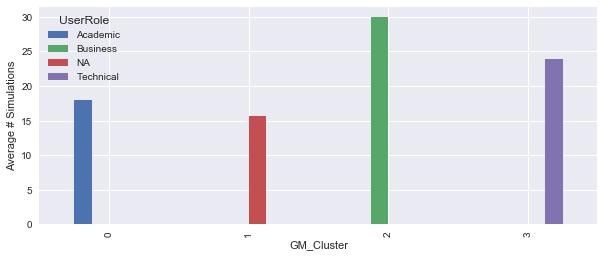

In [136]:
# categorical vs categorical vs numeric
agg = df_users_clustered.groupby(['GM_Cluster', 'UserRole'])['NumSims'].mean()
print(agg)
agg = agg.unstack(level='UserRole')
print(agg)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
agg.plot(kind='bar', ax=ax).set_ylabel('Average # Simulations')

KM_Cluster  UserRole 
0           Academic     21.415713
            Business     26.482759
            Technical    14.668639
1           Academic     16.363059
            Business     27.857143
            NA           17.611111
            Technical    17.175066
2           Business     34.772563
            NA           28.716312
            Technical    30.270052
3           NA           13.684211
Name: NumSims, dtype: float64
UserRole     Academic   Business         NA  Technical
KM_Cluster                                            
0           21.415713  26.482759        NaN  14.668639
1           16.363059  27.857143  17.611111  17.175066
2                 NaN  34.772563  28.716312  30.270052
3                 NaN        NaN  13.684211        NaN


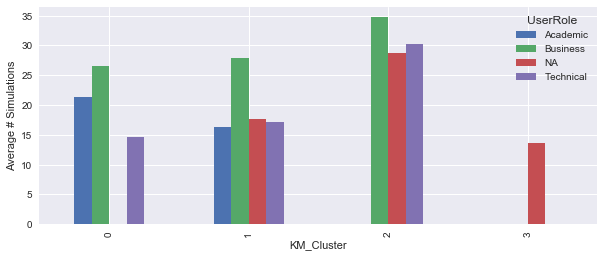

In [137]:
# categorical vs categorical vs numeric
agg = df_users_clustered.groupby(['KM_Cluster', 'UserRole'])['NumSims'].mean()
print(agg)
agg = agg.unstack(level='UserRole')
print(agg)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
agg.plot(kind='bar', ax=ax).set_ylabel('Average # Simulations')

AG_Cluster  UserRole 
0           Academic     32.315789
            Business     32.390071
            NA           28.510753
            Technical    31.165116
1           Academic     16.631135
            Business     27.857143
            NA           17.611111
            Technical    17.137566
2           Academic     14.214286
            Business     19.584507
            NA           12.875510
            Technical    14.666174
3           Academic     24.446429
            Business     51.548387
            NA           21.400000
            Technical    13.701493
Name: NumSims, dtype: float64
UserRole     Academic   Business         NA  Technical
AG_Cluster                                            
0           32.315789  32.390071  28.510753  31.165116
1           16.631135  27.857143  17.611111  17.137566
2           14.214286  19.584507  12.875510  14.666174
3           24.446429  51.548387  21.400000  13.701493


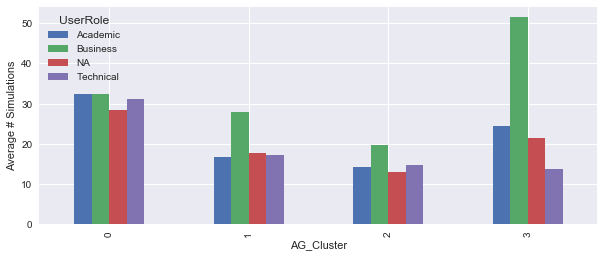

In [118]:
# categorical vs categorical vs numeric
agg = df_users_clustered.groupby(['AG_Cluster', 'UserRole'])['NumSims'].mean()
print(agg)
agg = agg.unstack(level='UserRole')
print(agg)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
agg.plot(kind='bar', ax=ax).set_ylabel('Average # Simulations')

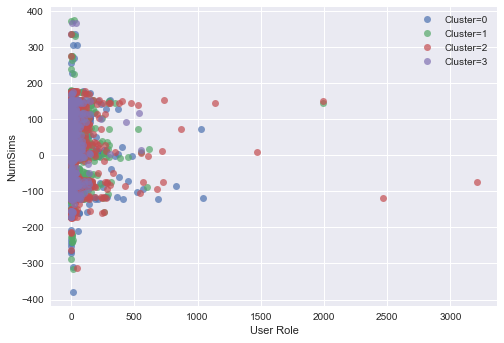

In [121]:
# Scatter plot by category
clusters = df_users_clustered['KM_Cluster'].unique()
for clust in clusters:
    plt.plot(df_users_clustered.loc[df_users_clustered.KM_Cluster==clust, 'NumSims'], 
             df_users_clustered.loc[df_users_clustered.KM_Cluster==clust, 'Longitude'], 
             linestyle='',
             marker='o',
             alpha=.7, label='Cluster={}'.format(clust))
plt.xlabel('User Role')
plt.ylabel('NumSims')
plt.legend(numpoints=1);

In [83]:
df_users_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8741 entries, 0 to 8740
Data columns (total 18 columns):
UserId                8741 non-null object
NumSims               8741 non-null int64
UserRole              8741 non-null object
OrganizationType      8741 non-null object
Sample                8741 non-null bool
Latitude              8741 non-null float64
Longitude             8741 non-null float64
ImportedWind          8741 non-null bool
ImportedSolar         8741 non-null bool
GenCostMultiLines     8741 non-null bool
WindCostMultiLines    8741 non-null bool
BatCostMultiLines     8741 non-null bool
PvCostMultiLines      8741 non-null bool
ConCostMultiLines     8741 non-null bool
Country               8741 non-null object
GM_Cluster            8741 non-null int64
KM_Cluster            8741 non-null uint8
AG_Cluster            8741 non-null int64
dtypes: bool(8), float64(2), int64(3), object(4), uint8(1)
memory usage: 691.5+ KB


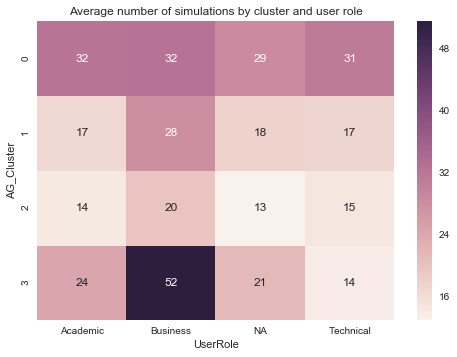

In [89]:
# Heat-map
import seaborn as sns

agg = df_users_clustered.groupby(['AG_Cluster', 'UserRole'])['NumSims'].mean()
ax = sns.heatmap(agg.unstack(level='UserRole'), annot=True)
ax.set_title('Average number of simulations by cluster and user role')

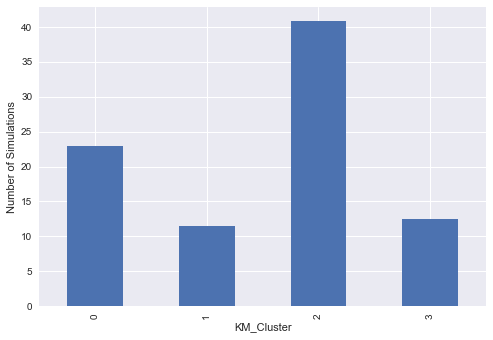

In [144]:
df_usa = df_users_clustered[df_users_clustered['Country'] == 'US']
df_usa.head()

grp = df_usa.groupby('KM_Cluster')['NumSims'].mean()
grp.plot(kind='bar').set_ylabel('Number of Simulations');

<function matplotlib.pyplot.show>

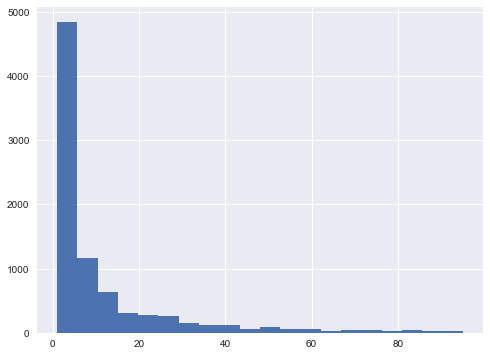

In [128]:
sims = df_users_clustered['NumSims'].values
mu = sims.mean()
std = sims.std()
sims = [s for s in sims if s <= mu + std and s >= mu - std]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.hist(sims, 20)
plt.show

GM_Cluster  OrganizationType
0           Academic            2994
            Engineering          249
            NA                   932
            Public                56
            Service               27
            Vendor                47
1           Academic             144
            Engineering          141
            NA                   980
            Public                20
            Service               22
            Vendor                23
2           Academic              98
            Engineering          277
            NA                   142
            Public                31
            Service               53
            Vendor                93
3           Academic             377
            Engineering         1052
            NA                   676
            Public                68
            Service               62
            Vendor               177
Name: OrganizationType, dtype: int64
OrganizationType  Academic  Engineering   NA  

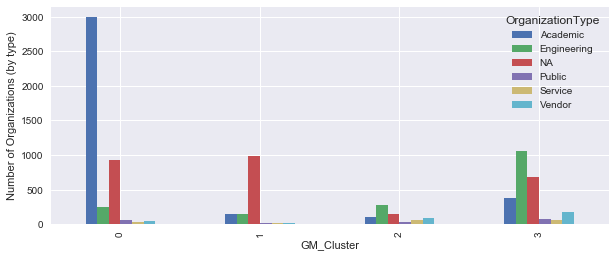

In [125]:
# categorical vs categorical vs numeric
agg = df_users_clustered.groupby(['GM_Cluster', 'OrganizationType'])['OrganizationType'].count()
print(agg)
agg = agg.unstack(level='OrganizationType')
print(agg)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
agg.plot(kind='bar', ax=ax).set_ylabel('Number of Organizations (by type)')

KM_Cluster  OrganizationType
0           Engineering          249
            NA                  1750
            Public                87
            Service               80
            Vendor               140
1           Academic            3613
2           Engineering         1470
            Public                68
            Service               62
            Vendor               177
3           NA                   980
            Public                20
            Service               22
            Vendor                23
Name: OrganizationType, dtype: int64
OrganizationType  Academic  Engineering      NA  Public  Service  Vendor
KM_Cluster                                                              
0                      NaN        249.0  1750.0    87.0     80.0   140.0
1                   3613.0          NaN     NaN     NaN      NaN     NaN
2                      NaN       1470.0     NaN    68.0     62.0   177.0
3                      NaN          NaN   980.0    

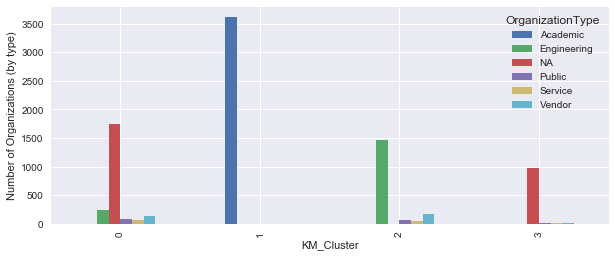

In [126]:
# categorical vs categorical vs numeric
agg = df_users_clustered.groupby(['KM_Cluster', 'OrganizationType'])['OrganizationType'].count()
print(agg)
agg = agg.unstack(level='OrganizationType')
print(agg)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
agg.plot(kind='bar', ax=ax).set_ylabel('Number of Organizations (by type)')

AG_Cluster  OrganizationType
0           Engineering         1718
            Service              164
            Vendor               340
1           Academic            3613
            Engineering            1
            NA                   918
2           NA                  1812
            Public                 1
3           Public               174
Name: OrganizationType, dtype: int64
OrganizationType  Academic  Engineering      NA  Public  Service  Vendor
AG_Cluster                                                              
0                      NaN       1718.0     NaN     NaN    164.0   340.0
1                   3613.0          1.0   918.0     NaN      NaN     NaN
2                      NaN          NaN  1812.0     1.0      NaN     NaN
3                      NaN          NaN     NaN   174.0      NaN     NaN


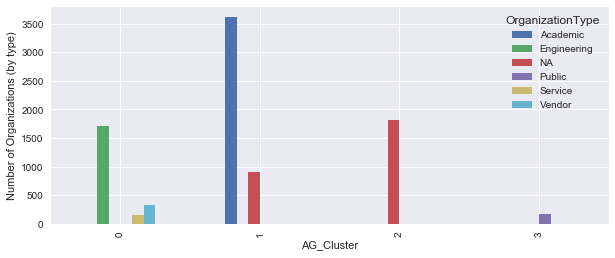

In [127]:
# Categorical vs categorical vs numeric
agg = df_users_clustered.groupby(['AG_Cluster', 'OrganizationType'])['OrganizationType'].count()
print(agg)
agg = agg.unstack(level='OrganizationType')
print(agg)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
agg.plot(kind='bar', ax=ax).set_ylabel('Number of Organizations (by type)')

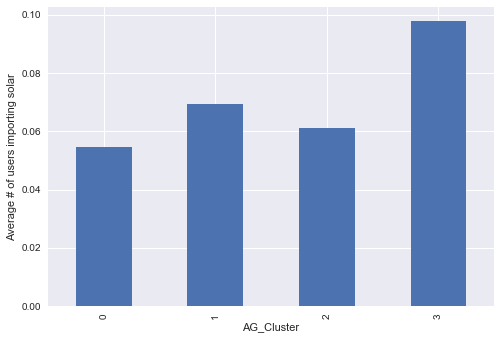

In [146]:
grp = df_users_clustered.groupby('AG_Cluster')['ImportedSolar'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users importing solar');

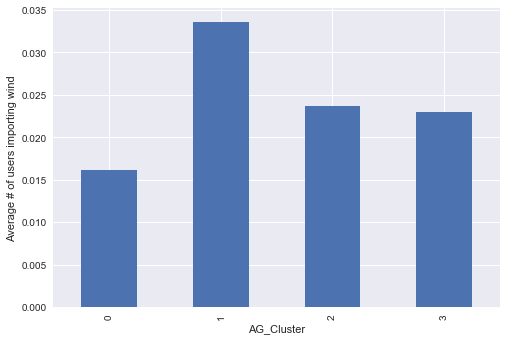

In [147]:
grp = df_users_clustered.groupby('AG_Cluster')['ImportedWind'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users importing wind');

In [148]:
df_users_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8741 entries, 0 to 8740
Data columns (total 18 columns):
UserId                8741 non-null object
NumSims               8741 non-null int64
UserRole              8741 non-null object
OrganizationType      8741 non-null object
Sample                8741 non-null bool
Latitude              8741 non-null float64
Longitude             8741 non-null float64
ImportedWind          8741 non-null bool
ImportedSolar         8741 non-null bool
GenCostMultiLines     8741 non-null bool
WindCostMultiLines    8741 non-null bool
BatCostMultiLines     8741 non-null bool
PvCostMultiLines      8741 non-null bool
ConCostMultiLines     8741 non-null bool
Country               8741 non-null object
GM_Cluster            8741 non-null int64
KM_Cluster            8741 non-null uint8
AG_Cluster            8741 non-null int64
dtypes: bool(8), float64(2), int64(3), object(4), uint8(1)
memory usage: 691.5+ KB


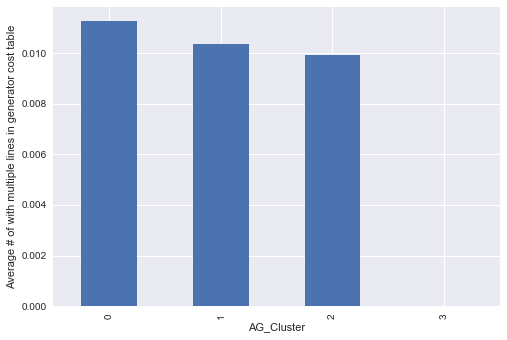

In [150]:
grp = df_users_clustered.groupby('AG_Cluster')['GenCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in generator cost table');

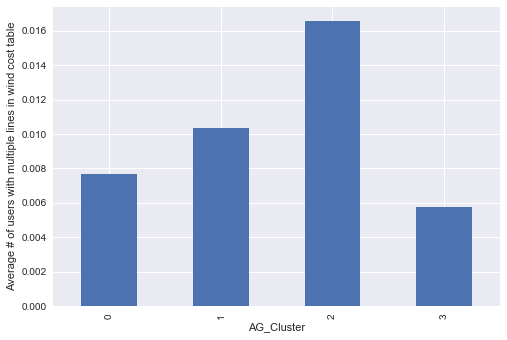

In [151]:
grp = df_users_clustered.groupby('AG_Cluster')['WindCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in wind cost table');

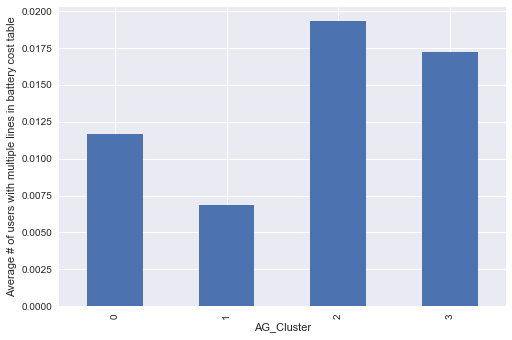

In [152]:
grp = df_users_clustered.groupby('AG_Cluster')['BatCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in battery cost table');

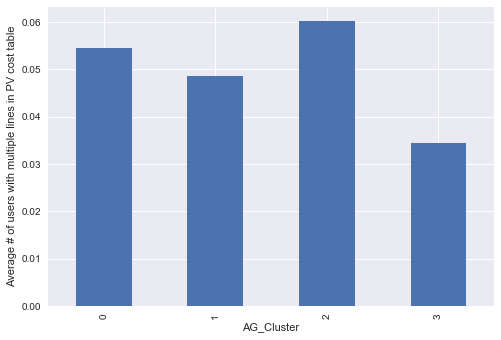

In [153]:
grp = df_users_clustered.groupby('AG_Cluster')['PvCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in PV cost table');

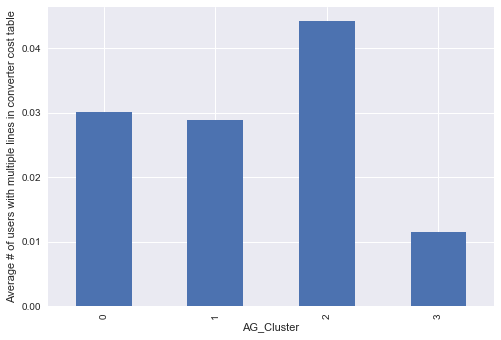

In [154]:
grp = df_users_clustered.groupby('AG_Cluster')['ConCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in converter cost table');

In [ ]:
# np.round(cluster3[['NumSims', 'DaysSinceFirst']].describe(), 2).T[['count','mean', 'std', 'min', 'max']]